In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from isc301.config import housing_prices_raw_path
from isc301.main import data_preprocessing, model_fit, model_predict, model_fit_overfitting
from sklearn.metrics import r2_score



In [2]:
df = pd.read_csv(housing_prices_raw_path)
df.head()

,surf_hab,qualite_materiau,surface_sous_sol,qualite_globale,n_garage_voitures,n_toilettes,n_cheminees,n_pieces,n_cuisines,n_chambres_coucher,annee_vente,prix,type_toit,type_batiment,qualite_cuisine,surface_jardin
0,1710,7,856,5,2,1,0,8,1,3,2008,208500,2 pans,individuelle,bonne,451.271415
1,1262,6,1262,8,2,0,1,6,1,3,2007,181500,2 pans,individuelle,moyenne,0.000000
2,1786,7,920,5,2,1,1,6,1,3,2008,223500,2 pans,individuelle,bonne,466.368854
3,1717,7,756,5,3,0,1,7,1,3,2006,140000,2 pans,individuelle,bonne,152.302986
4,2198,8,1145,5,3,1,1,9,1,4,2008,250000,2 pans,individuelle,bonne,378.184663


# Find correlations 

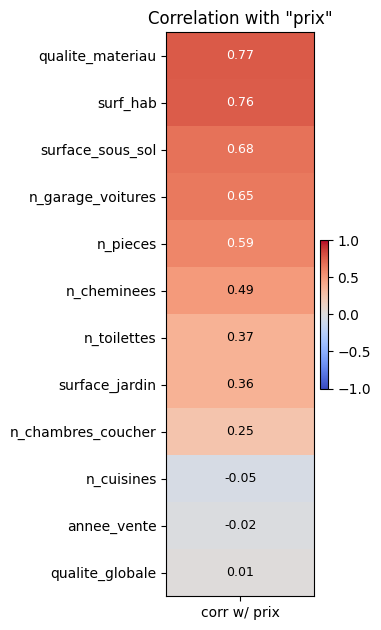

In [3]:
# keep only numeric columns and ensure 'prix' has no NaNs
num = df.select_dtypes(include='number').dropna(subset=['prix'])

# correlation of every numeric feature with price
corr_with_price = (
    num.corr(numeric_only=True)['prix']     # correlations against 'prix'
       .drop('prix')                        # drop self-correlation
       .sort_values(key=lambda s: s.abs(),  # sort by absolute strength
                    ascending=False)
)

# draw a 1-column heatmap 
values = corr_with_price.values.reshape(-1, 1)

fig, ax = plt.subplots(figsize=(4, 0.45*len(corr_with_price)+1))
im = ax.imshow(values, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')

ax.set_yticks(range(len(corr_with_price)))
ax.set_yticklabels(corr_with_price.index)
ax.set_xticks([0])
ax.set_xticklabels(['corr w/ prix'])

# annotate each cell with the numeric value
for i, v in enumerate(corr_with_price.values):
    ax.text(0, i, f'{v:.2f}', ha='center', va='center',
            color=('white' if abs(v) > 0.5 else 'black'), fontsize=9)

plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
ax.set_title('Correlation with "prix"')
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Price vs. qualité matériau'}, xlabel='qualite_materiau', ylabel='prix'>

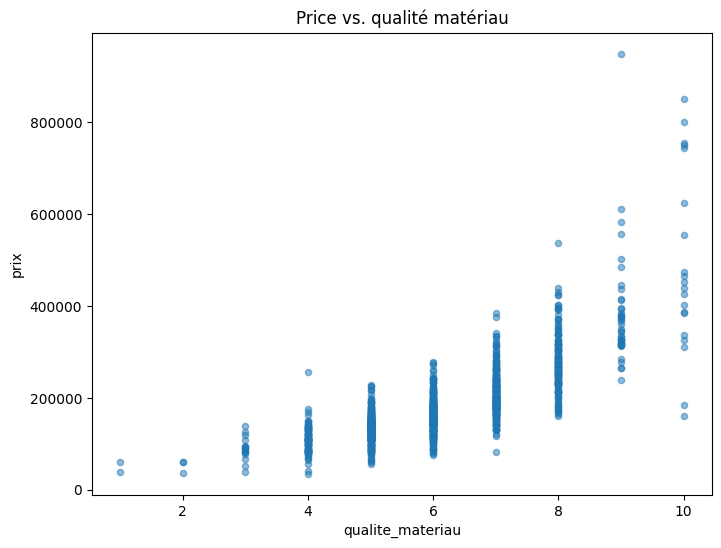

In [4]:
# correlation of price and qualité matériau
df.plot(
    kind='scatter',
    y='prix',
    x='qualite_materiau',
    alpha=0.5,
    figsize=(8,6),
    title='Price vs. qualité matériau'
)

<Axes: title={'center': 'Price vs. Surface Area'}, xlabel='surf_hab', ylabel='prix'>

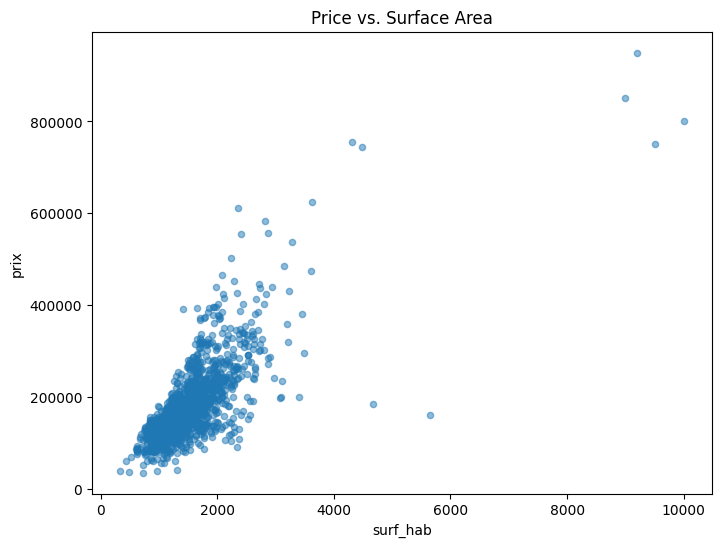

In [5]:
# correlation of price and surface habitable
df.plot(
    kind='scatter',
    y='prix',
    x='surf_hab',
    alpha=0.5,
    figsize=(8,6),
    title='Price vs. Surface Area'
)

<Axes: title={'center': 'Price vs. Surface sous sol'}, xlabel='surface_sous_sol', ylabel='prix'>

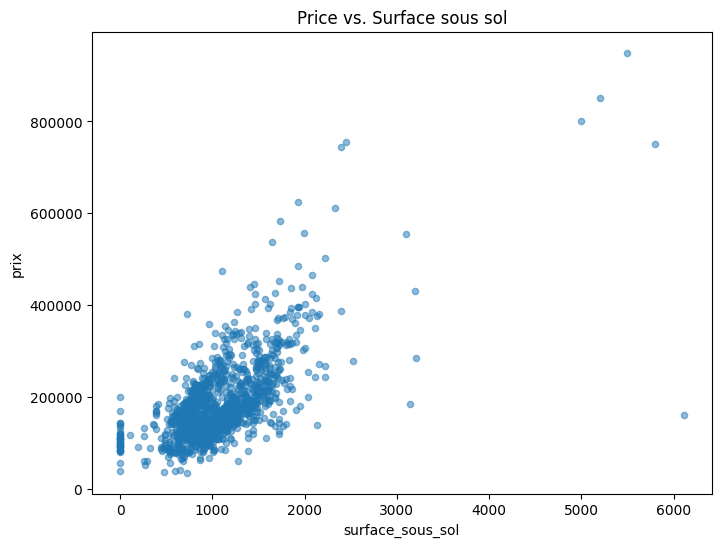

In [6]:
# correlation of price and surface sous sol
df.plot(
    kind='scatter',
    y='prix',
    x='surface_sous_sol',
    alpha=0.5,
    figsize=(8,6),
    title='Price vs. Surface sous sol'
)

## Outliers

<Axes: >

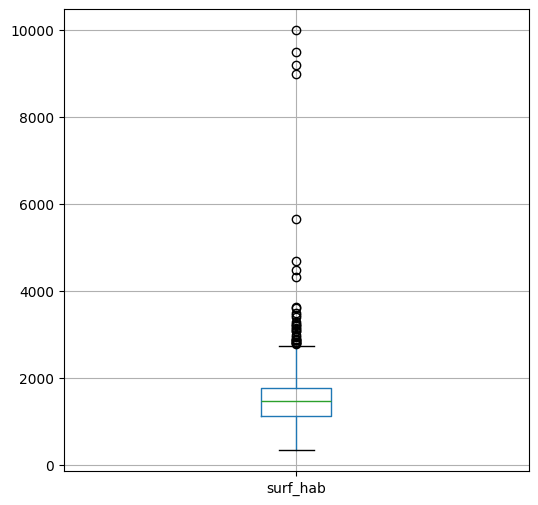

In [7]:
# show outliers for surface habitable
df.boxplot(column='surf_hab', figsize=(6,6))

<Axes: >

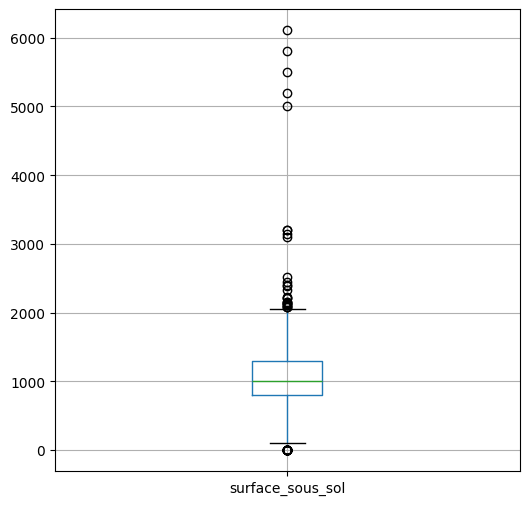

In [8]:
df.boxplot(column='surface_sous_sol', figsize=(6,6))

# Model

In [9]:
X, Y, X_test, Y_test, X_val, Y_val, scaler = data_preprocessing(df)
#print(X)
#print(Y)

In [10]:
# model 
model, poly = model_fit(X, Y)

# overfitting demonstration
modelO, polyO = model_fit_overfitting(X, Y)

In [11]:
# predict model
y_pred = model_predict(model, poly, X)
y_pred_val = model_predict(model, poly, X_val)

# predict overfitting model
y_predO = model_predict(modelO, polyO, X)
y_predO_val = model_predict(modelO, polyO, X_val)


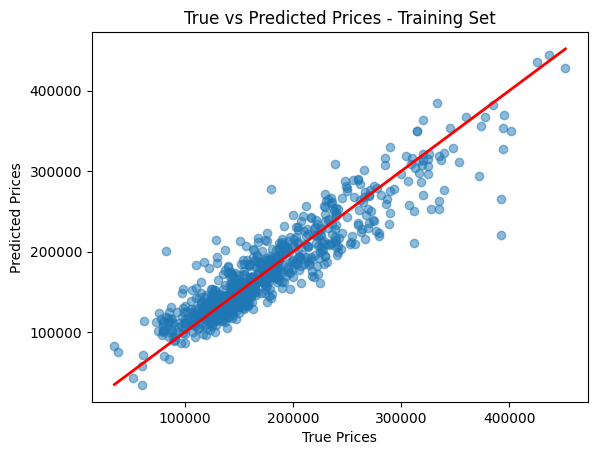

In [12]:
# True vs predicted prices - Training set
plt.scatter(Y, y_pred, alpha=0.5)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linewidth=2)
plt.title("True vs Predicted Prices - Training Set")
plt.show()

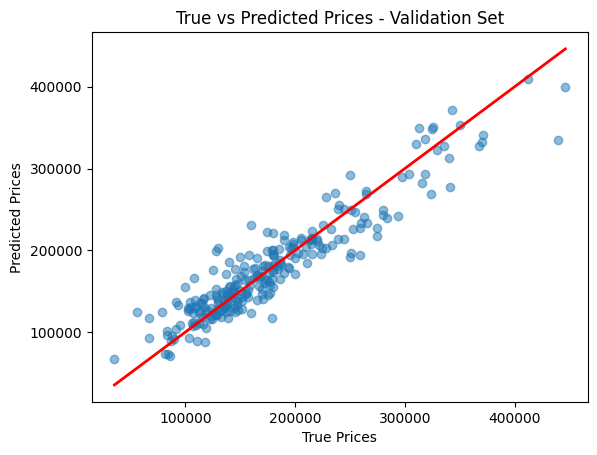

In [13]:
# True vs predicted prices - Validation set
plt.scatter(Y_val, y_pred_val, alpha=0.5)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.plot([Y_val.min(), Y_val.max()], [Y_val.min(), Y_val.max()], color='red', linewidth=2)
plt.title("True vs Predicted Prices - Validation Set")
plt.show()

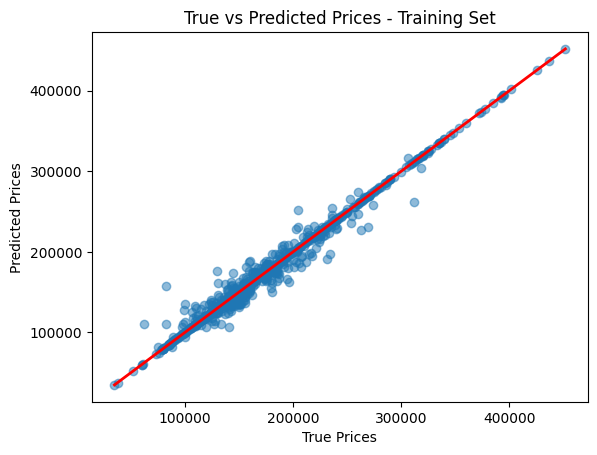

In [22]:
# True vs predicted prices - Training set
plt.scatter(Y, y_predO, alpha=0.5)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linewidth=2)
plt.title("True vs Predicted Prices - Training Set")
plt.show()

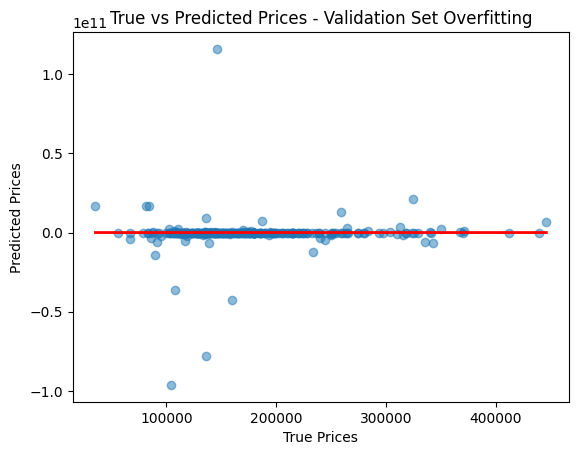

In [21]:
# True vs predicted prices - Validation set
plt.scatter(Y_val, y_predO_val, alpha=0.5)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.plot([Y_val.min(), Y_val.max()], [Y_val.min(), Y_val.max()], color='red', linewidth=2)
plt.title("True vs Predicted Prices - Validation Set Overfitting")
plt.show()

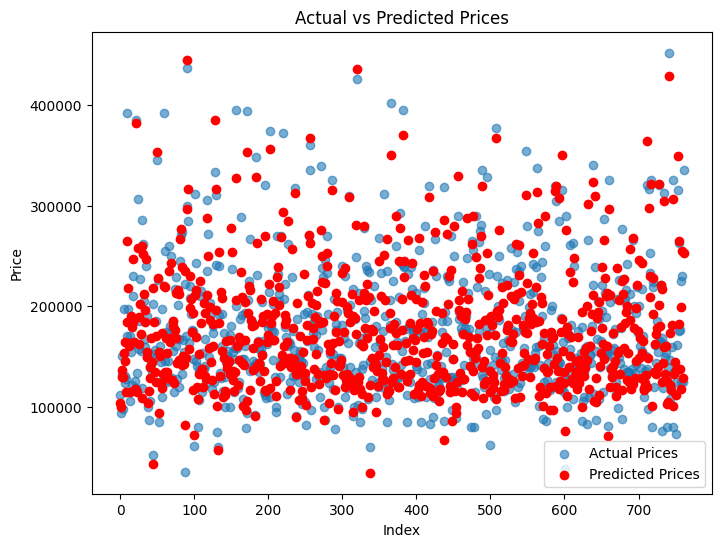

In [15]:
# See predicted prices over actual prices on plot 
plt.figure(figsize=(8,6))
plt.scatter(range(len(Y)), Y, label='Actual Prices', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Prices', color='red')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

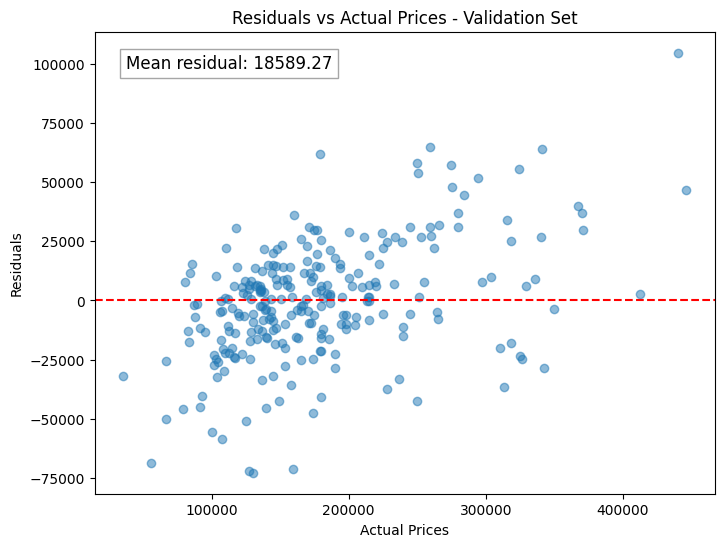

18589.27183443487


In [16]:
# get validation residuals 
residuals_val = Y_val - y_pred_val
mean_residual = np.mean(np.abs(residuals_val))
plt.figure(figsize=(8,6))
plt.scatter(Y_val, residuals_val, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Actual Prices - Validation Set")
# Annotate mean residual on the plot
plt.text(
    0.05, 0.95, 
    f"Mean residual: {mean_residual:.2f}", 
    transform=plt.gca().transAxes, 
    fontsize=12, 
    verticalalignment='top', 
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
)
plt.show()
# print mean absolute error
print(np.mean(np.abs(residuals_val)))

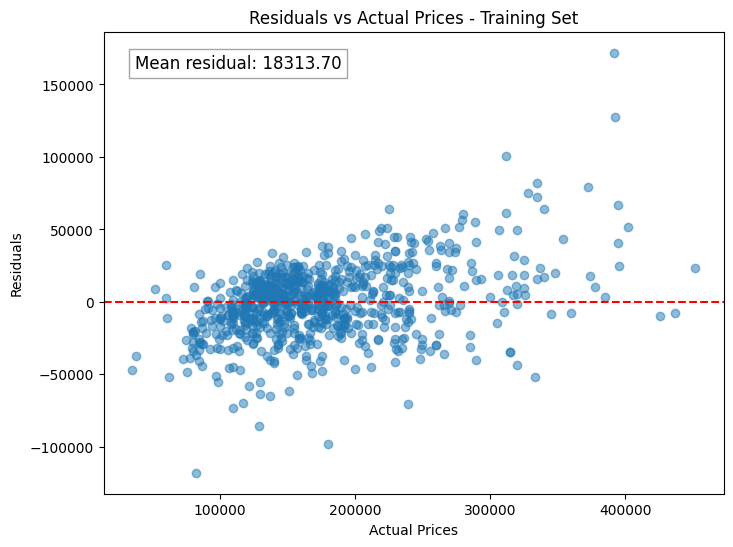

18313.699587541756


In [17]:
# get training residuals 
residuals = Y - y_pred
mean_residual = np.mean(np.abs(residuals))
plt.figure(figsize=(8,6))
plt.scatter(Y, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Actual Prices - Training Set")
plt.text(
    0.05, 0.95, 
    f"Mean residual: {mean_residual:.2f}", 
    transform=plt.gca().transAxes, 
    fontsize=12, 
    verticalalignment='top', 
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
)
plt.show()
# print mean absolute error
print(np.mean(np.abs(residuals)))

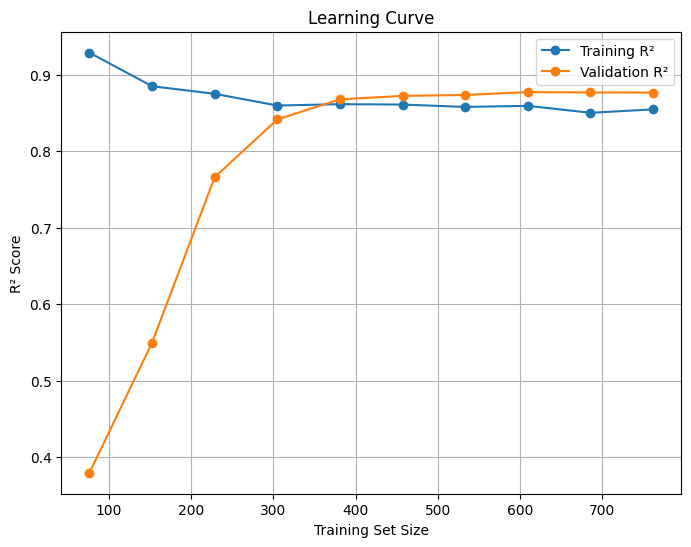

In [18]:
train_sizes = np.linspace(0.1, 1.0, 10)
train_scores = []
val_scores = []
for train_size in train_sizes:
    size = int(train_size * len(X))
    model_temp, poly_temp = model_fit(X[:size], Y[:size])
    y_train_pred = model_predict(model_temp, poly_temp, X[:size])
    y_val_pred = model_predict(model_temp, poly_temp, X_val)
    train_scores.append(r2_score(Y[:size], y_train_pred))
    val_scores.append(r2_score(Y_val, y_val_pred))

plt.figure(figsize=(8,6))
plt.plot(train_sizes * len(X), train_scores, 'o-', label='Training R²')
plt.plot(train_sizes * len(X), val_scores, 'o-', label='Validation R²')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
r2 = r2_score(Y, y_pred)
print("R² score:", r2)

R² score: 0.8545012037589321


In [20]:
r2_val = r2_score(Y_val, y_pred_val)
print("R² score validation:", r2_val)

R² score validation: 0.8765142221823239
